In [1]:
!pip install nemoguardrails==0.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of sqlalchemy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of sqlalchemy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency re

In [1]:
!pip install openai==0.28.0
!pip install --upgrade huggingface_hub sentence_transformers
!pip install pinecone-client==2.2.2
!pip install datasets==3.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: sentence_transformers
    Found existing installation: sentence-transformers 2.2.2
    Uninstalling sentence-transformers-2.2.2:
      Successfully uninstalled sentence-transformers-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nemoguardrails 0.4.0 requires sentence-transformers==2.2.2, but you have sentence-transformers 3.3.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
!pip show nemoguardrails

Name: nemoguardrails
Version: 0.4.0
Summary: NeMo Guardrails is an open-source toolkit for easily adding programmable guardrails to LLM-based conversational systems.
Home-page: https://github.com/NVIDIA/NeMo-Guardrails
Author: NVIDIA
Author-email: nemoguardrails@nvidia.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, annoy, fastapi, httpx, Jinja2, langchain, pydantic, PyYAML, requests, sentence-transformers, setuptools, simpleeval, starlette, typer, typing-extensions, uvicorn
Required-by: 


In [ ]:
!pip show pinecone-client

Name: pinecone-client
Version: 2.2.2
Summary: Pinecone client and SDK
Home-page: https://www.pinecone.io/
Author: Pinecone Systems, Inc.
Author-email: support@pinecone.io
License: Proprietary License
Location: /usr/local/lib/python3.10/dist-packages
Requires: dnspython, loguru, numpy, python-dateutil, pyyaml, requests, tqdm, typing-extensions, urllib3
Required-by: 


In [2]:
import os
#
os.environ["OPENAI_API_KEY"] = ""

In [3]:
#To begin, we need to setup our data and retrieval components for RAG. We'll start with a dataset that contains info on the recent Llama 2 models:

from datasets import load_dataset

data = load_dataset(
    "jamescalam/llama-2-arxiv-papers-chunked",
    split="train"
)


README.md:   0%|          | 0.00/409 [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4838 [00:00<?, ? examples/s]

In [ ]:
#pip install --upgrade datasets

In [4]:
!pip show datasets

Name: datasets
Version: 3.2.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: 


In [5]:
data

Dataset({
    features: ['doi', 'chunk-id', 'chunk', 'id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'references'],
    num_rows: 4838
})

In [6]:
data[0]

{'doi': '1102.0183',
 'chunk-id': '0',
 'chunk': 'High-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nTechnical Report No. IDSIA-01-11\nJanuary 2011\nIDSIA / USI-SUPSI\nDalle Molle Institute for Arti\x0ccial Intelligence\nGalleria 2, 6928 Manno, Switzerland\nIDSIA is a joint institute of both University of Lugano (USI) and University of Applied Sciences of Southern Switzerland (SUPSI),\nand was founded in 1988 by the Dalle Molle Foundation which promoted quality of life.\nThis work was partially supported by the Swiss Commission for Technology and Innovation (CTI), Project n. 9688.1 IFF:\nIntelligent Fill in Form.arXiv:1102.0183v1  [cs.AI]  1 Feb 2011\nTechnical Report No. IDSIA-01-11 1\nHigh-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nJanuary 2011\nAbs

In [7]:
data[3200]

{'doi': '1903.00089',
 'chunk-id': '9',
 'chunk': 'implemented in Tensorﬂow-Lingvo (Shen et al.,\n2019).\nIn all cases we report test results for the checkpoint that performed best on the development set\nin terms of BLEU. For the multilingual models we\ncreate a development set that includes examples\nwe uniformly sample from a concatenation of all\nthe individual language pair development sets, resulting in 13k development examples per model.\nAnother important detail regarding multilingual\ntraining is the batching scheme. In all of our multilingual models we use heterogeneous batching,\nwhere each batch contains examples which are\nuniformly sampled from a concatenation of all the\nlanguage pairs the model is trained on. Speciﬁcally, we use batches of 64 examples for sequences\nshorter than 69 tokens and batches of 16 examples for longer sequences. We did not use oversampling as the dataset is relatively small.\n2.3 Results\nWe use tokenized BLEU in order to be comparable with Neub

In [8]:
data = data.map(lambda x: {
    'uid': f"{x['doi']}-{x['chunk-id']}"
})


Map:   0%|          | 0/4838 [00:00<?, ? examples/s]

In [9]:
type(data)

datasets.arrow_dataset.Dataset

In [10]:
data

Dataset({
    features: ['doi', 'chunk-id', 'chunk', 'id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'references', 'uid'],
    num_rows: 4838
})

In [11]:
data[3]

{'doi': '1102.0183',
 'chunk-id': '3',
 'chunk': 'Mutch and Lowe, 2008), whose \x0clters are \x0cxed, in contrast to those of Convolutional Neural\nNetworks (CNNs) (LeCun et al. , 1998; Behnke, 2003; Simard et al. , 2003), whose weights (\x0clters)\nare randomly initialized and changed in a supervised way using back-propagation (BP).\nDespite the hardware progress of the past decades, computational speed is still a limiting\nfactor for CNN architectures characterized by many building blocks typically set by trial and\nerror. To systematically test the impact of various architectures on classi\x0ccation performance,\nwe present a fast CNN implementation on Graphics Processing Units (GPUs). Previous GPU\nimplementations of CNNs (Chellapilla et al. , 2006; Uetz and Behnke, 2009) were hard-coded to\nsatisfy GPU hardware constraints, whereas our implementation is \rexible and fully online (i.e.,\nTechnical Report No. IDSIA-01-11 2\nweight updates after each image). It allows for training la

In [12]:
data = data.to_pandas()
# drop irrelevant fields
data = data[['uid', 'chunk', 'title', 'source']]

In [13]:
data

,uid,chunk,title,source
0,1102.0183-0,High-Performance Neural Networks\nfor Visual O...,High-Performance Neural Networks for Visual Ob...,http://arxiv.org/pdf/1102.0183
1,1102.0183-1,"January 2011\nAbstract\nWe present a fast, ful...",High-Performance Neural Networks for Visual Ob...,http://arxiv.org/pdf/1102.0183
2,1102.0183-2,promising architectures for such tasks. The mo...,High-Performance Neural Networks for Visual Ob...,http://arxiv.org/pdf/1102.0183
3,1102.0183-3,"Mutch and Lowe, 2008), whose lters are xed, ...",High-Performance Neural Networks for Visual Ob...,http://arxiv.org/pdf/1102.0183
4,1102.0183-4,We evaluate various networks on the handwritte...,High-Performance Neural Networks for Visual Ob...,http://arxiv.org/pdf/1102.0183
...,...,...,...,...
4833,2307.09288-315,"BytheCentralLimitTheorem, Zntendstowardsastand...",Llama 2: Open Foundation and Fine-Tuned Chat M...,http://arxiv.org/pdf/2307.09288
4834,2307.09288-316,Table 52 presents a model card (Mitchell et al...,Llama 2: Open Foundation and Fine-Tuned Chat M...,http://arxiv.org/pdf/2307.09288
4835,2307.09288-317,models will be released as we improve model sa...,Llama 2: Open Foundation and Fine-Tuned Chat M...,http://arxiv.org/pdf/2307.09288
4836,2307.09288-318,Training Factors We usedcustomtraininglibrarie...,Llama 2: Open Foundation and Fine-Tuned Chat M...,http://arxiv.org/pdf/2307.09288


In [14]:
#Now we can create embeddings like so:
import openai

embed_model_id = "text-embedding-ada-002"

res = openai.Embedding.create(
    input=[
        "We would have some text to embed here",
        "And maybe another chunk here too"
    ], engine=embed_model_id
)

In [15]:
res

<OpenAIObject list at 0x7ea3059bfa10> JSON: {
  "object": "list",
  "data": [
    {
      "object": "embedding",
      "index": 0,
      "embedding": [
        -0.018120672553777695,
        0.012319729663431644,
        0.003181788371875882,
        -0.006091960705816746,
        -0.0005201933090575039,
        0.021587012335658073,
        -0.008433032780885696,
        -0.007010282017290592,
        -0.010373148135840893,
        -0.008995666168630123,
        0.0016878999304026365,
        0.024212634190917015,
        0.00921554584056139,
        -0.005490525159984827,
        0.0017574207158759236,
        0.018819114193320274,
        0.015339842066168785,
        0.005438788793981075,
        0.0003714511694852263,
        -0.035103145986795425,
        -0.008342494256794453,
        0.0015237985644489527,
        -0.004129211418330669,
        0.004142145160585642,
        -0.025506043806672096,
        0.0009886502521112561,
        0.022350123152136803,
        -0.0203970745

In [16]:
type(res)

openai.openai_object.OpenAIObject

In [17]:
res.keys()

dict_keys(['object', 'data', 'model', 'usage'])

In [18]:
len(res['data'])

2

In [19]:
len(res['data'][0]['embedding']), len(res['data'][1]['embedding'])

(1536, 1536)

In [20]:
res['data'][0]['embedding']

[-0.018120672553777695,
 0.012319729663431644,
 0.003181788371875882,
 -0.006091960705816746,
 -0.0005201933090575039,
 0.021587012335658073,
 -0.008433032780885696,
 -0.007010282017290592,
 -0.010373148135840893,
 -0.008995666168630123,
 0.0016878999304026365,
 0.024212634190917015,
 0.00921554584056139,
 -0.005490525159984827,
 0.0017574207158759236,
 0.018819114193320274,
 0.015339842066168785,
 0.005438788793981075,
 0.0003714511694852263,
 -0.035103145986795425,
 -0.008342494256794453,
 0.0015237985644489527,
 -0.004129211418330669,
 0.004142145160585642,
 -0.025506043806672096,
 0.0009886502521112561,
 0.022350123152136803,
 -0.02039707452058792,
 -0.010974583216011524,
 -0.019944380968809128,
 0.02453598752617836,
 -0.017202353104948997,
 -0.00891159474849701,
 -0.022259585559368134,
 -0.02462652511894703,
 -0.00662225903943181,
 -0.006415313109755516,
 0.0022214315831661224,
 0.026747718453407288,
 -0.022789882495999336,
 -0.003899631090462208,
 0.007922136224806309,
 0.0120869

In [22]:
import os
#from pinecone import Pinecone

# initialize connection to pinecone (get API key at app.pinecone.io)
api_key = ""



In [23]:
import pinecone

# Initialize the client
pinecone.init(
    api_key=api_key      # Replace with your API key
    )

In [24]:
# List existing indexes to confirm connection
print(pinecone.list_indexes())

[]


In [25]:
index_name = "linkedin-rag-with-actions"

In [27]:
# Create a new index
pinecone.create_index(index_name,  dimension=len(res['data'][0]['embedding']), metric='cosine')

In [28]:
##post the index creation , we get to see the following in our  pinecone index

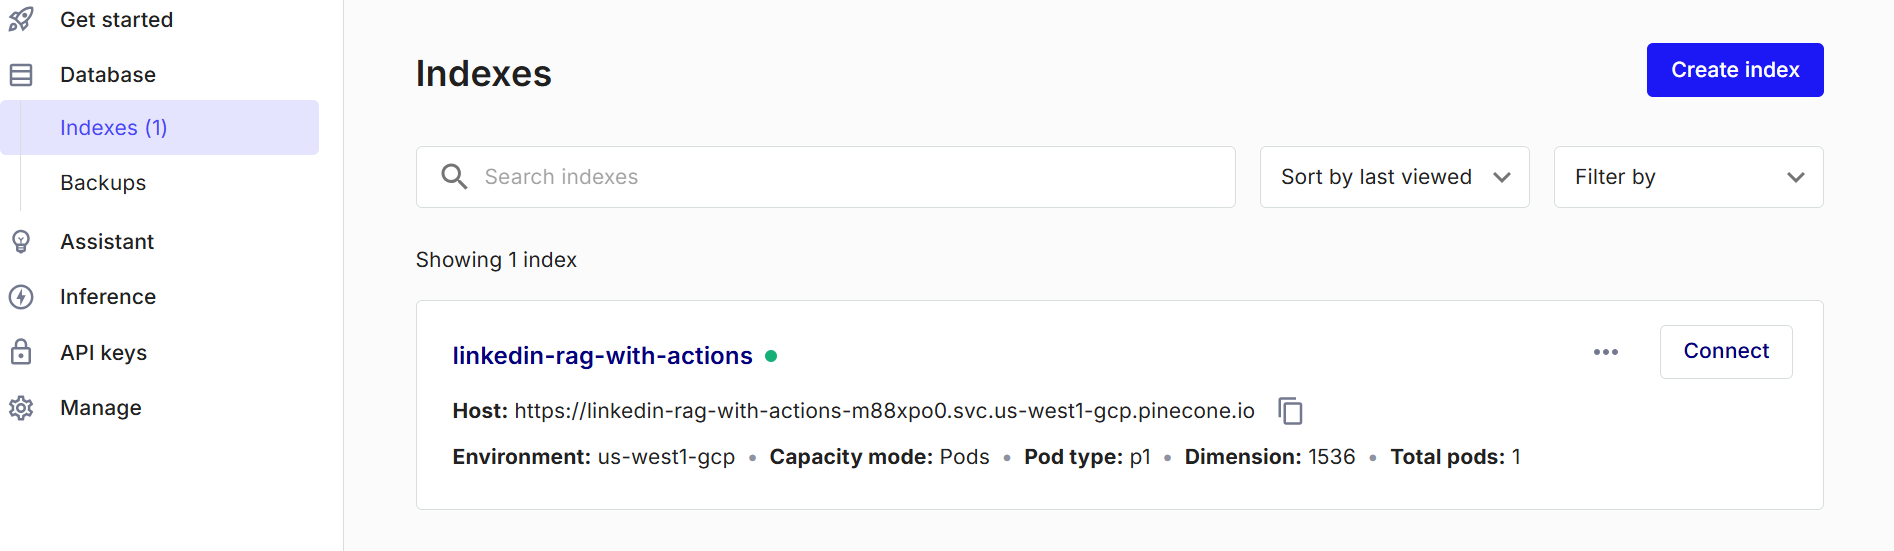

In [29]:
# Connect to an existing index
index = pinecone.Index(index_name)

In [30]:
index

In [31]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [32]:
from tqdm.auto import tqdm

batch_size = 100  # how many embeddings we create and insert at once

for i in tqdm(range(0, len(data), batch_size)):
    # find end of batch
    print(f"inside for loop")
    i_end = min(len(data), i+batch_size)
    batch = data[i:i_end]
    # get ids
    ids_batch = batch['uid'].to_list()
    # get texts to encode
    texts = batch['chunk'].to_list()
    # create embeddings
    res = openai.Embedding.create(input=texts, engine=embed_model_id)
    embeds = [record['embedding'] for record in res['data']]
    # create metadata
    metadata = [{
        'chunk': x['chunk'],
        'source': x['source']
    } for _, x in batch.iterrows()]
    to_upsert = list(zip(ids_batch, embeds, metadata))
    # upsert to Pinecone
    index.upsert(vectors=to_upsert)

  0%|          | 0/49 [00:00<?, ?it/s]

inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop
inside for loop


In [33]:
## if we now see the pinecone index , we  see the followin records inserted

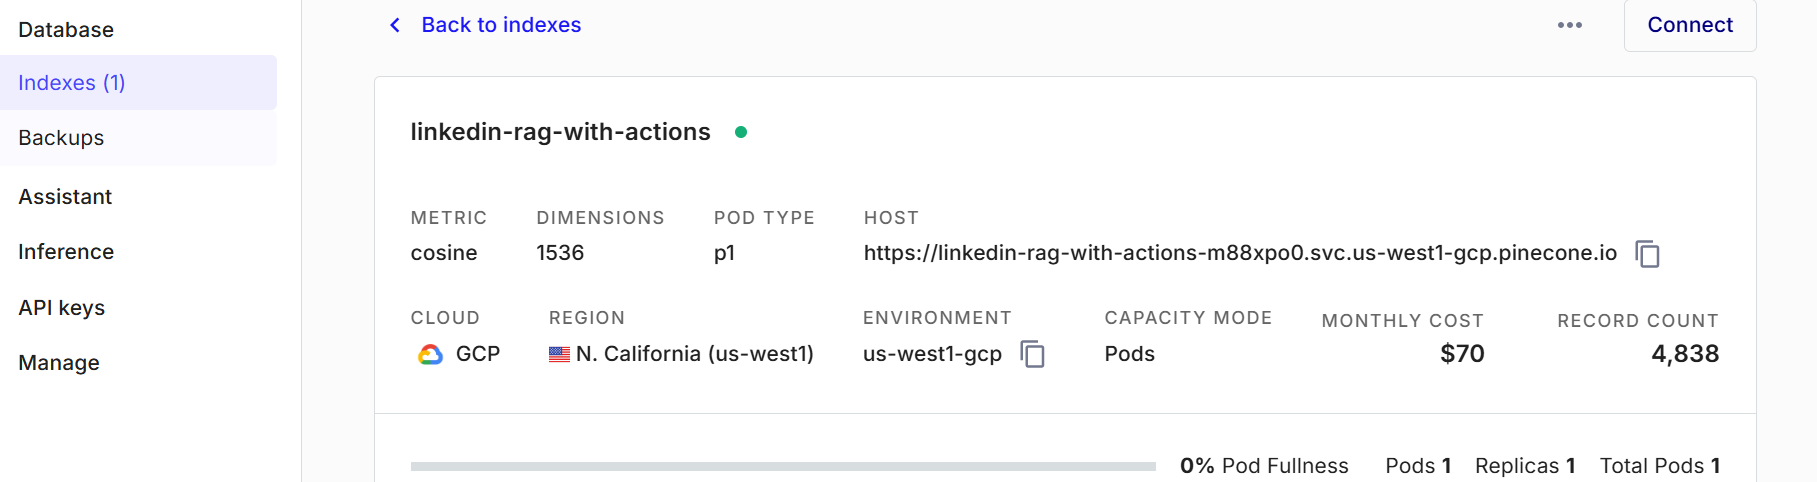

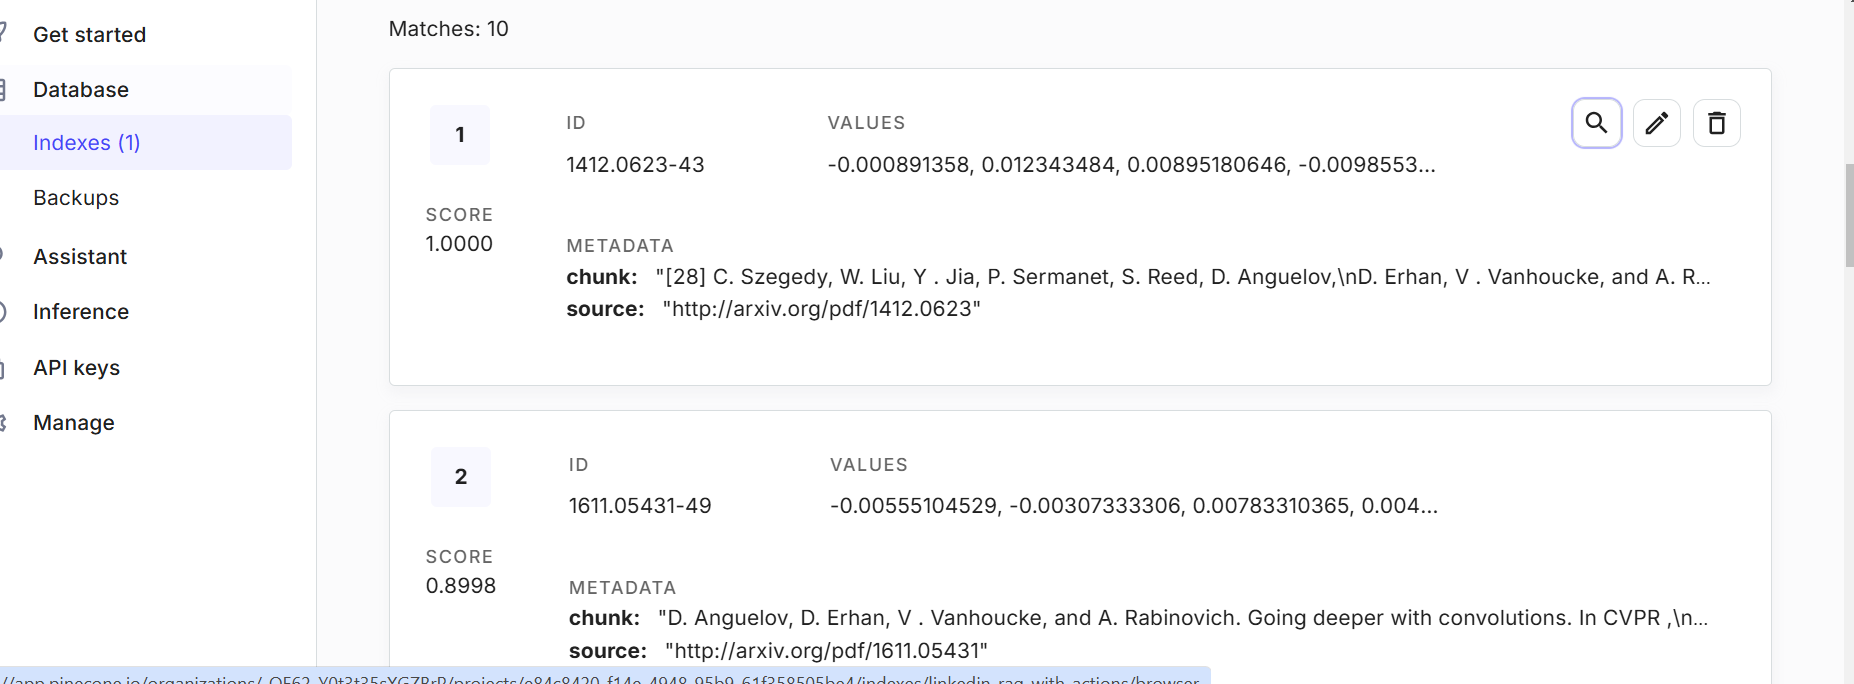

RAG Functions for Guardrails

In [35]:
#Now that we've added all of our text data to the index let's create a "retrieve function" that will allow us to take a user query,
# retrieve relevant records, and return them for use by our LLM.

In [36]:
async def retrieve(query: str) -> list:
    # create query embedding
    res = openai.Embedding.create(input=[query], engine=embed_model_id)
    xq = res['data'][0]['embedding']
    # get relevant contexts from pinecone
    res = index.query(xq, top_k=5, include_metadata=True)
    # get list of retrieved texts
    contexts = [x['metadata']['chunk'] for x in res['matches']]
    return contexts

In [37]:
async def rag(query: str, contexts: list) -> str:
    print("> RAG Called")  # we'll add this so we can see when this is being used
    context_str = "\n".join(contexts)
    # place query and contexts into RAG prompt
    prompt = f"""You are a helpful assistant, below is a query from a user and
    some relevant contexts. Answer the question given the information in those
    contexts. If you cannot find the answer to the question, say "I don't know".

    Contexts:
    {context_str}

    Query: {query}

    Answer: """
    # generate answer
    res = openai.Completion.create(
        engine="gpt-4o",
        prompt=prompt,
        temperature=0.0,
        max_tokens=100
    )
    return res['choices'][0]['text']

# Guardrails

In [38]:
#We now need to initialize our configs for Rails:

In [39]:
yaml_content = """
models:
- type: main
  engine: openai
  model: gpt-4o
"""

rag_colang_content = """
# define limits
define user ask politics
    "what are your political beliefs?"
    "thoughts on the president?"
    "left wing"
    "right wing"

define bot answer politics
    "I'm a shopping assistant, I don't like to talk of politics."
    "Sorry I can't talk about politics!"

define flow politics
    user ask politics
    bot answer politics
    bot offer help

# define RAG intents and flow
define user ask llama
    "tell me about llama 2?"
    "what is large language model"
    "where did meta's new model come from?"
    "how to llama?"
    "have you ever meta llama?"

define flow llama
    user ask llama
    $contexts = execute retrieve(query=$last_user_message)
    $answer = execute rag(query=$last_user_message, contexts=$contexts)
    bot $answer
"""

In [40]:
from nemoguardrails import LLMRails, RailsConfig

# initialize rails config
config = RailsConfig.from_content(
    colang_content=rag_colang_content,
    yaml_content=yaml_content
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [41]:
# create rails
rag_rails = LLMRails(config)

/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:200: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:801: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [42]:
rag_rails

In [ ]:
# Remember! We need to register any actions that are used in the
# Colang config file, otherwise our rails have no idea how to execute retrieve or execute rag. We register both like so:

In [43]:
rag_rails.register_action(action=retrieve, name="retrieve")
rag_rails.register_action(action=rag, name="rag")

In [44]:
#Now let's try out our RAG agent.

In [45]:
await rag_rails.generate_async(prompt="hello")

"Hello again! How are you doing today? Is there something specific you'd like to know or talk about?"

In [46]:
await rag_rails.generate_async(prompt="tell me about llama 2")

"LLaMA 2, which stands for 'Large Language Model Meta AI,' is a family of language models developed by Meta (formerly Facebook). It was released in July 2023 and represents an evolution of the original LLaMA model, which was launched earlier. LLaMA 2 is designed to be even more powerful and efficient in generating human-like text, understanding context, and performing various natural language processing tasks.\nThe LLaMA 2 models come in different sizes, similar to other popular language models. They are trained on diverse datasets to ensure a wide-ranging understanding of languages and subject matter. One of the key focuses of LLaMA 2 is to make large language models more accessible, allowing researchers and developers to utilize its capabilities for building applications in various fields such as chatbots, content generation, and more.\nMoreover, LLaMA 2 emphasizes safety and ethical considerations, incorporating measures to reduce biases and harmful outputs that can arise in AI-gene